In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

### Eigenvectors for Two-Notes

Reading the data

In [37]:
flute = scipy.io.loadmat('D:/iu/Semester 2/MLSP/assignment1/data/flute.mat')

In [38]:
X = np.array(flute['X'])

In [39]:
X.shape

(128, 143)

In [40]:
w1 = np.random.normal(0,1,(128,1))

In [41]:
# w1.shape
prev_lambda=0

In [42]:
for i in range(1,50):
    threshold = 0.000001
    print("******************")
    print("Iteration ",i)
    w1 = w1 / np.sqrt(np.sum(w1**2)) 
    z = np.dot(np.transpose(w1),X)
    lambda1 = np.dot(z,np.transpose(z))
    gradient = 2*X
    gradient = np.dot(gradient,np.transpose(X))
    gradient = np.dot(gradient,w1)
    diff = lambda1-prev_lambda
    print("diff",diff)
    prev_lambda = lambda1
    print("lambda",lambda1)
    if diff<threshold:
        print("Difference in gradient is lesser than 0.000001 hence converged")
        break
    w1 = w1 + 0.0001*gradient

******************
Iteration  1
diff [[820.59189698]]
lambda [[820.59189698]]
******************
Iteration  2
diff [[157264.11362428]]
lambda [[158084.70552126]]
******************
Iteration  3
diff [[30258.03584094]]
lambda [[188342.7413622]]
******************
Iteration  4
diff [[294.18962701]]
lambda [[188636.93098921]]
******************
Iteration  5
diff [[17.37231262]]
lambda [[188654.30330183]]
******************
Iteration  6
diff [[1.102268]]
lambda [[188655.40556983]]
******************
Iteration  7
diff [[0.0699866]]
lambda [[188655.47555643]]
******************
Iteration  8
diff [[0.00444368]]
lambda [[188655.48000012]]
******************
Iteration  9
diff [[0.00028214]]
lambda [[188655.48028226]]
******************
Iteration  10
diff [[1.79142808e-05]]
lambda [[188655.48030018]]
******************
Iteration  11
diff [[1.1374068e-06]]
lambda [[188655.48030131]]
******************
Iteration  12
diff [[7.2264811e-08]]
lambda [[188655.48030139]]
Difference in gradient is lesser

Calculating the components necessary for subtracting the effect of first eigen vector from data.

In [43]:
s1 = np.dot(np.transpose(w1),X)
s1 = np.sqrt(np.sum(s1**2))

In [44]:
u1 = np.dot(np.transpose(X),w1)/s1

In [48]:
temp = np.dot(w1,s1)

In [49]:
temp = np.dot(temp,np.transpose(u1))

In [50]:
Xtrans = X - temp 

In [51]:
Xtrans.shape

(128, 143)

In [52]:
w2 = np.random.normal(0,1,(128,1))
prev_lambda = 0 

In [53]:
for i in range(1,50):
    threshold = 1e-5
    print("******************")
    print("Iteration ",i)
    w2 = w2 / np.sqrt(np.sum(w2**2))
 
    z = np.dot(np.transpose(w2),Xtrans)
    lambda1 = np.dot(z,np.transpose(z))
    gradient = 2*Xtrans
    gradient = np.dot(gradient,np.transpose(Xtrans))
    gradient = np.dot(gradient,w2)
    diff = lambda1-prev_lambda
    print("diff",diff)
    prev_lambda = lambda1
    print("lambda",lambda1)
    if diff<threshold:
        print("Difference in gradient is lesser than 0.000001 hence converged")
        break
    w2 = w2 + 0.0001*gradient

******************
Iteration  1
diff [[74.89558928]]
lambda [[74.89558928]]
******************
Iteration  2
diff [[5986.74613281]]
lambda [[6061.6417221]]
******************
Iteration  3
diff [[35046.89577153]]
lambda [[41108.53749362]]
******************
Iteration  4
diff [[2658.46603528]]
lambda [[43767.0035289]]
******************
Iteration  5
diff [[29.75080115]]
lambda [[43796.75433005]]
******************
Iteration  6
diff [[0.31272098]]
lambda [[43797.06705103]]
******************
Iteration  7
diff [[0.00328491]]
lambda [[43797.07033594]]
******************
Iteration  8
diff [[3.4505676e-05]]
lambda [[43797.07037045]]
******************
Iteration  9
diff [[3.62459105e-07]]
lambda [[43797.07037081]]
Difference in gradient is lesser than 0.000001 hence converged


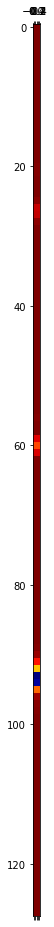

In [54]:
plt.matshow(w1,cmap="jet");

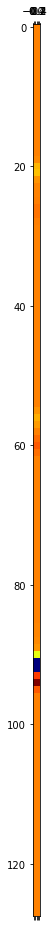

In [55]:
plt.matshow(w2,cmap="jet");

In [56]:
w = np.column_stack((w1,w2))

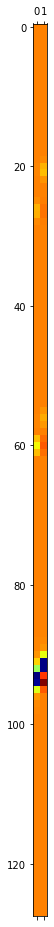

In [57]:
plt.matshow(w,cmap="jet");

In [58]:
temporal = np.dot(np.transpose(w),X)
temp0=temporal[0].reshape(143,1)
temp1=temporal[1].reshape(143,1)

# temporal[1]=temporal[1].reshape(143,1)

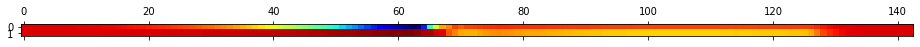

In [59]:
plt.matshow(temporal,cmap="jet");

In [60]:
first = np.dot(w1,np.transpose(temp0))

In [61]:
second = np.dot(w2,np.transpose(temp1))

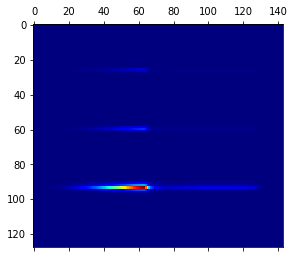

In [62]:
plt.matshow(first,cmap="jet");

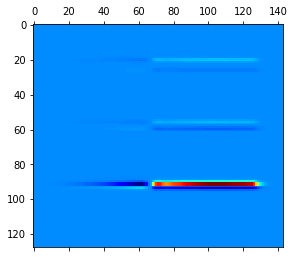

In [63]:
plt.matshow(second,cmap="jet");